<h1 align="center">🧠 Churn Prediction using Machine Learning & Deep Learning</h1>

# **📥 Importing Required Libraries**

In [ ]:
# 📦 Data Handling and Processing
import pandas as pd                       # For loading and manipulating tabular data (DataFrames)
import numpy as np                        # For numerical computations and array handling

# 📊 Visualization
import matplotlib.pyplot as plt           # For basic plotting (line plots, bar charts, etc.)
import seaborn as sns                     # For advanced statistical visualizations (heatmaps, pairplots, etc.)

# 🧼 Data Preprocessing
from sklearn.preprocessing import LabelEncoder         # General preprocessing tools (LabelEncoder, MinMaxScaler, etc.)
from sklearn.preprocessing import OneHotEncoder  # To convert categorical variables into one-hot encoded vectors
from sklearn.preprocessing import StandardScaler  # To standardize features (mean=0, variance=1)

# 🧪 Train-Test Splitting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# 🤖 Classical Machine Learning Models
from sklearn.linear_model import LogisticRegression       # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier        # K-Nearest Neighbors classifier
from sklearn.svm import SVC                               # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree # Decision Tree Classifier and tree visualization
from sklearn.ensemble import RandomForestClassifier       # Random Forest Classifier (ensemble of trees)
from sklearn.naive_bayes import GaussianNB                # Naive Bayes classifier for normally distributed features

# 🌐 Model Evaluation and Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)  # Comprehensive evaluation metrics for classification models

# 📊 3D Plotting and Custom Color Maps
from matplotlib.colors import ListedColormap             # For custom coloring of scatter plots
from mpl_toolkits.mplot3d import Axes3D                  # For 3D scatter plots using matplotlib

# 🔍 Dimensionality Reduction and Feature Selection
from sklearn.decomposition import PCA                    # Principal Component Analysis for reducing dimensions
from sklearn.feature_selection import mutual_info_classif # For estimating mutual information between features and target

# 🚀 Advanced Gradient Boosting Models
from xgboost import XGBClassifier                        # XGBoost classifier (gradient boosting algorithm)
from lightgbm import LGBMClassifier                      # LightGBM classifier (efficient boosting method)

# 🤖 Artificial Neural Networks with TensorFlow/Keras
from tensorflow.keras.models import Sequential           # Sequential model for ANN in Keras
from tensorflow.keras.layers import Dense                # Dense (fully connected) layer
from tensorflow.keras.optimizers import Adam             # Optimizer (Adam is adaptive learning rate optimizer)
from tensorflow.keras.utils import plot_model            # For visualizing model architecture

# ⚠️ Warning Suppression
import warnings
warnings.filterwarnings("ignore")                        # Suppresses warnings for cleaner output


# **📄 Reading the Dataset**

In [ ]:
df= pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# **🔍 Checking First 5 Rows**

In [ ]:
df.head()   # Show top 5 rows of the dataset

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# **ℹ️ Basic Information About the Dataset**

Displays general information including number of entries, data types, and missing values.

In [ ]:
df.info()  # Summary info about dataset like datatypes and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **🔢 Number of Rows and Columns**

Shows the shape (rows and columns) of the dataset.

In [ ]:
df.shape  # Get number of rows and columns in the dataset

(7043, 21)

# **🏷️ List of Column Names**

Displays all column names in the dataset.

In [ ]:
df.columns  # Show column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **🏷️ Understanding Dataframe Index**

In [ ]:
df.index   #Returns the index (row labels) of the DataFrame

RangeIndex(start=0, stop=7043, step=1)

# **📊 Statistical Summary of Numerical Columns**

Gives a summary like mean, min, max, etc., for all numerical columns.

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

# **❗ Checking for Missing Values**

Displays the number of missing values in each column.

In [ ]:
df.isnull().sum()  # Count missing values in each column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **🔹 Converting non-numeric values to 0 of "Previous" column**

In [ ]:
# Loop through 'MonthlyCharges' and 'TotalCharges' columns
for col in ['MonthlyCharges', 'TotalCharges']:
    # Convert to numeric, fill NaNs with 0, round, and cast to int
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float).round().astype(int)

df    # Display the updated DataFrame


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check             30            30   
1                  No               Mailed check             57          1890   
2                 Yes               Mailed check             54           108   
3                  No  Bank transfer (automatic)             42          1841   
4                 Yes           Electronic check             71           152   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check             85          1990   
7039              Yes    Credit card (automatic)            103          7363   
7040              Yes           Electronic check             30           346   
7041              Yes               Mailed check             74           307   
7042              Yes  Bank transfer (automatic)            106          6844   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

# **⚠️ Detecting Numeric Anomalies (Outliers)**

Boxplots are used to find extremely high or low values (outliers) that could be errors or rare cases.

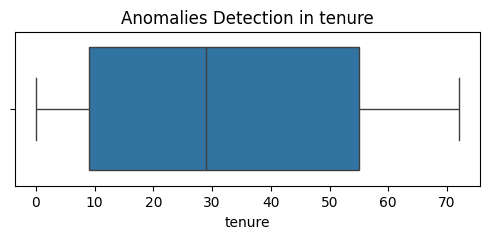

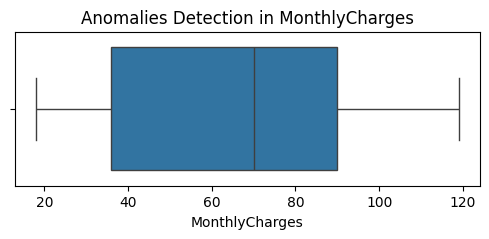

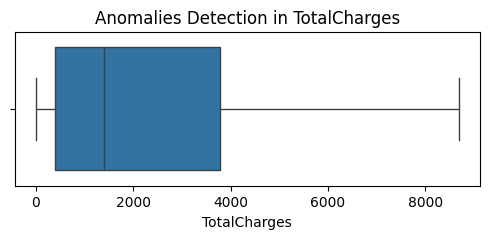

In [ ]:
# List of numerical columns to check for anomalies
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through each column and draw a boxplot
for col in columns:
    plt.figure(figsize=(6, 2))              # Set the size of the plot
    sns.boxplot(x=df[col])                  # Create a boxplot for the column
    plt.title(f"Anomalies Detection in {col}")  # Set the plot title
    plt.show()                              # Display the plot

# **🧾 Detecting Categorical Anomalies**

Check how many times each category (Yes/No/etc.) appears in categorical columns to spot irregular or missing values.

In [ ]:
# List of categorical columns to check for anomalies
columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
           'PaymentMethod','Churn']

# Loop through each column to display value counts including NaN
for col in columns:
    print(f"Anomalies Detection in {col}")                     # Print column name
    print(df[col].value_counts(dropna=False))                 # Show count of each category including missing values
    print("\n")                                               # Print a blank line for better readability

Anomalies Detection in gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


Anomalies Detection in Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Anomalies Detection in Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Anomalies Detection in PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Anomalies Detection in MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Anomalies Detection in InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Anomalies Detection in OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Anomalies Detection in OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: i

# **🔗 Finding Correlation**

Correlation helps to understand how strongly numerical features are related to each other.

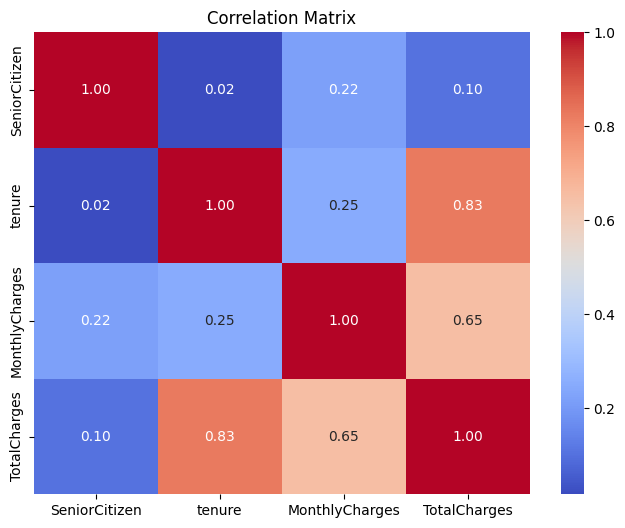

In [ ]:
# Plotting the correlation matrix for numerical features
plt.figure(figsize=(8,6))                                     # Set plot size
sns.heatmap(df.corr(numeric_only=True),                      # Compute correlation for numerical columns only
            annot=True, cmap='coolwarm', fmt=".2f")          # Show values and set style
plt.title("Correlation Matrix")                              # Title of the plot
plt.show()                                                   # Display the plot

# **📊 Visualization of Numerical Feature Distributions using Histograms**

<Figure size 1000x500 with 0 Axes>

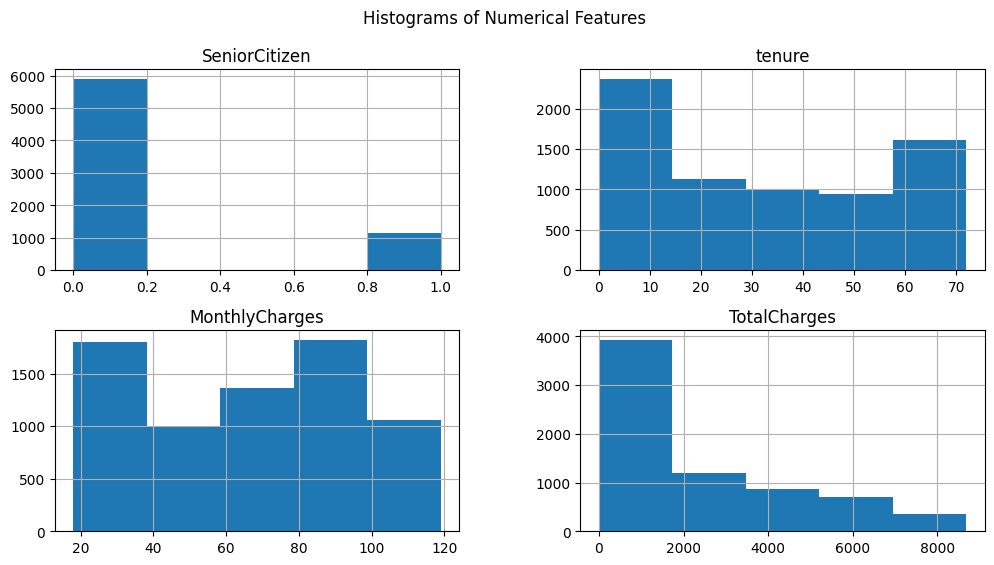

In [ ]:
plt.figure(figsize=(10,5))    # Set the overall figure size
df[['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']].hist(bins=5, figsize=(12,6))  # Plot histograms for selected numerical columns with 5 bins
plt.suptitle("Histograms of Numerical Features")      # Set the main title for all histograms
plt.show()  # Display the plots

# **🧑‍🤝‍🧑 Gender Distribution Count Plot**

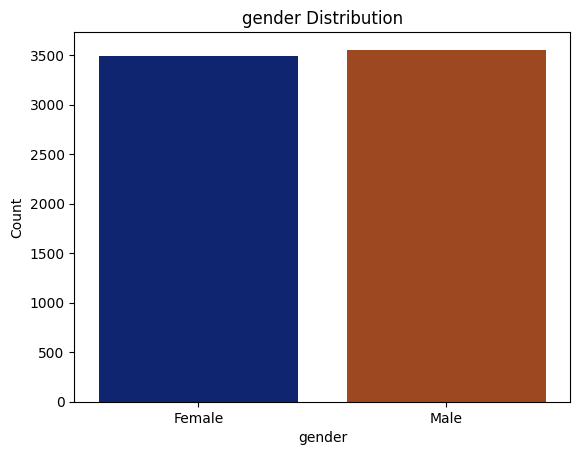

In [ ]:
sns.countplot(x='gender', data=df, palette='dark')  # Create a count plot for the 'gender' column
plt.title('gender Distribution') # Set the title of the plot
plt.xlabel('gender')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()    # Show the plot

# **🤝 Partner Distribution Count Plot**

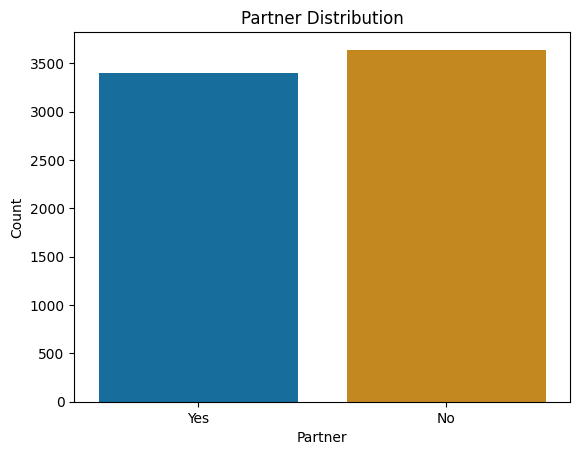

In [ ]:
sns.countplot(x='Partner', data=df, palette='colorblind') # Create a count plot for the 'Partner' column
plt.title('Partner Distribution')   # Set the title of the plot
plt.xlabel('Partner')     # Label the x-axis
plt.ylabel('Count')       # Label the y-axis
plt.show()                # Show the plot

# **📉 Dependents Distribution Count Plot**

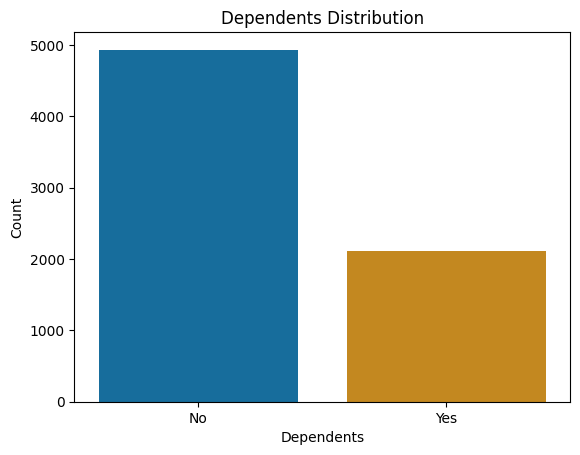

In [ ]:
sns.countplot(x='Dependents', data=df, palette='colorblind')  # Create a count plot for the 'Dependent' column
plt.title('Dependents Distribution')   # Set the title of the plot
plt.xlabel('Dependents')         # Label the x-axis
plt.ylabel('Count')              # Label the y-axis
plt.show()                       # Show the plot

# **📞 Phone Service Usage Distribution Count Plot**

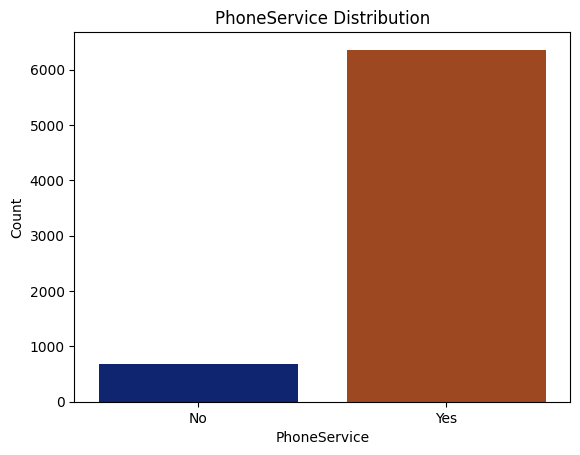

In [ ]:
sns.countplot(x='PhoneService', data=df, palette='dark')  # Create a count plot for the 'PhoneService' column
plt.title('PhoneService Distribution')    # Set the title of the plot
plt.xlabel('PhoneService')               # Label the x-axis
plt.ylabel('Count')                      # Label the y-axis
plt.show()                         # Show the plot

# **🔐 Online Security Service Distribution Count Plot**

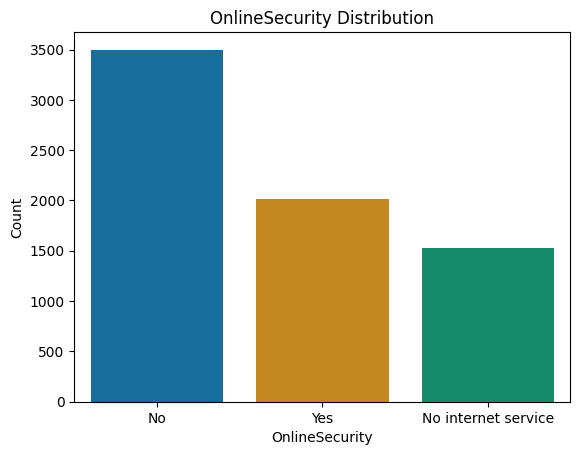

In [ ]:
sns.countplot(x='OnlineSecurity', data=df, palette='colorblind')  # Create a count plot for the 'OnlineSecurity' column
plt.title('OnlineSecurity Distribution')   # Set the title of the plot
plt.xlabel('OnlineSecurity')   # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show() # Show the plot

# **💾 Online Backup Service Distribution Count Plot**

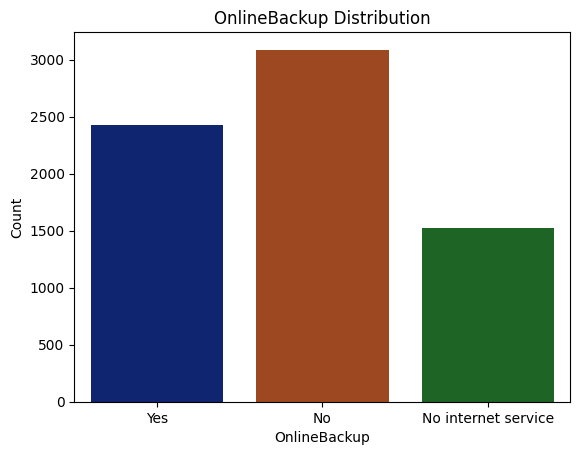

In [ ]:
sns.countplot(x='OnlineBackup', data=df, palette='dark') # Create a count plot for the 'OnlineBackup' column
plt.title('OnlineBackup Distribution') # Set the title of the plot
plt.xlabel('OnlineBackup')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show() # Show the plot

# **🛡️ Device Protection Service Distribution Count Plot**

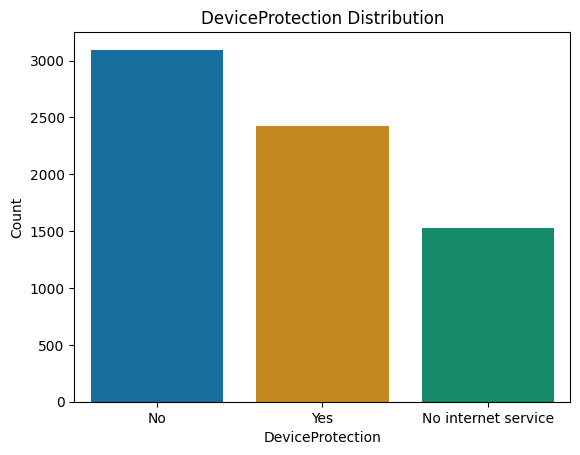

In [ ]:
sns.countplot(x='DeviceProtection', data=df, palette='colorblind')  # Create a count plot for the 'OnlineBackup' column
plt.title('DeviceProtection Distribution')  # Set the title of the plot
plt.xlabel('DeviceProtection')  # Label the x-axis
plt.ylabel('Count')   # Label the y-axis
plt.show() # Show the plot

# **🧰 Tech Support Service Distribution Count Plot**

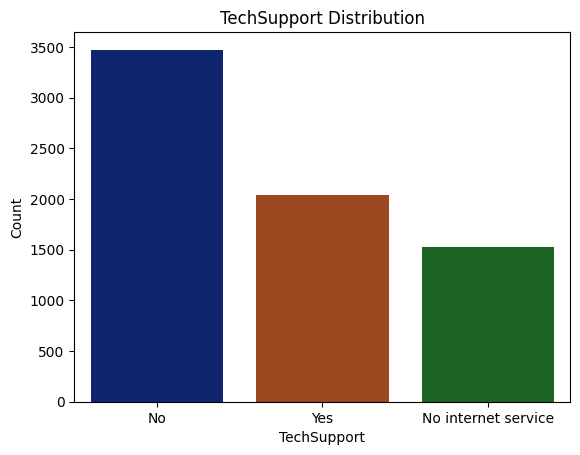

In [ ]:
sns.countplot(x='TechSupport', data=df, palette='dark') # Create a count plot for the 'TechSupport' column
plt.title('TechSupport Distribution')  # Set the title of the plot
plt.xlabel('TechSupport')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show() # Show the plot

# **📺 Streaming TV Service Distribution Count Plot**

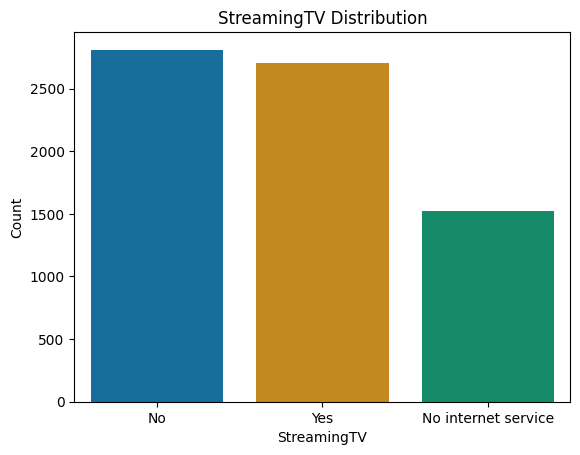

In [ ]:
sns.countplot(x='StreamingTV', data=df, palette='colorblind') # Create a count plot for the 'StreamingTV' column
plt.title('StreamingTV Distribution')  # Set the title of the plot
plt.xlabel('StreamingTV')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Show the plot

# **🎬 Streaming Movies Service Distribution Count Plot**

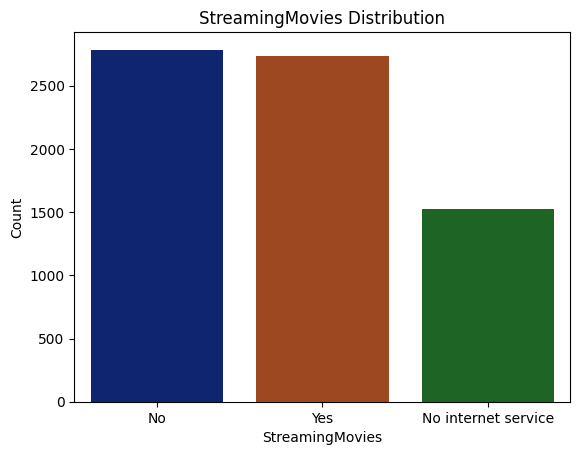

In [ ]:
sns.countplot(x='StreamingMovies', data=df, palette='dark') # Create a count plot for the 'StreamingMovies' column
plt.title('StreamingMovies Distribution') # Set the title of the plot
plt.xlabel('StreamingMovies')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Show the plot

# **📄 Paperless Billing Preference Distribution Count Plot**

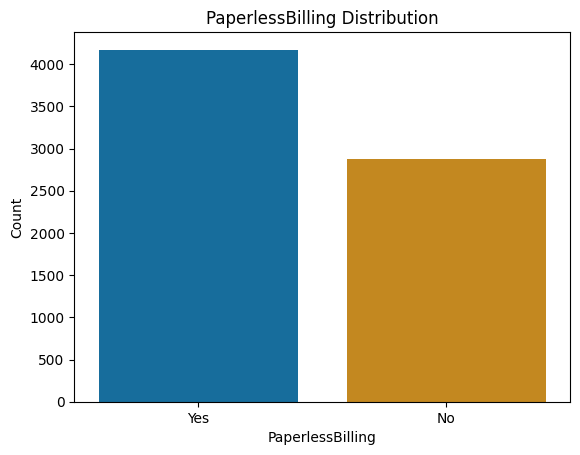

In [ ]:
sns.countplot(x='PaperlessBilling', data=df, palette='colorblind') # Create a count plot for the 'PaperlessBilling' column
plt.title('PaperlessBilling Distribution') # Set the title of the plot
plt.xlabel('PaperlessBilling') # Label the x-axis
plt.ylabel('Count') # Label the y-axis
plt.show() # Show the plot

# **🌐 Internet Service Type Distribution Count Plot**

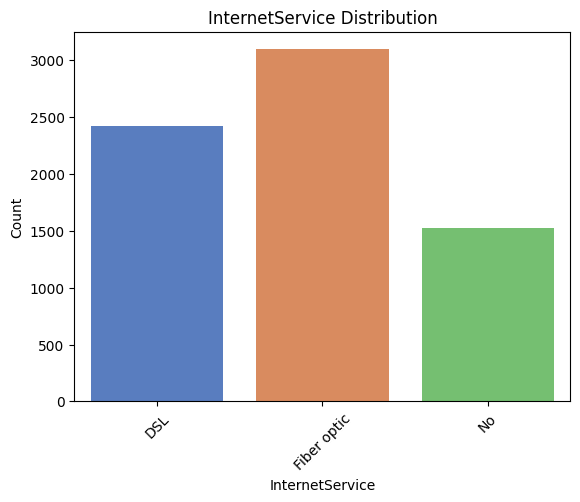

In [ ]:
# Define the desired order of categories for 'InternetService'
order = ['DSL', 'Fiber optic', 'No']
# Create a count plot for 'InternetService' with specified order and color palette
sns.countplot(x='InternetService', data=df, order=order, palette='muted')
plt.title('InternetService Distribution') # Set the title of the plot
plt.xlabel('InternetService') # Label the x-axis
plt.ylabel('Count') # Label the y-axis
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show() # Display the plot

# **💳 Payment Method Distribution using Pie Chart**

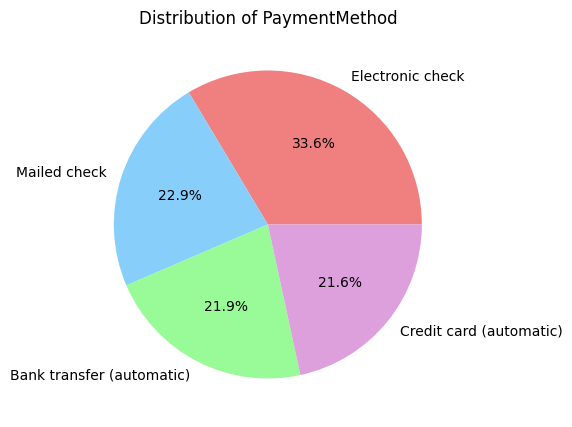

In [ ]:
# Set the figure size
plt.figure(figsize=(10,5))

# Create a pie chart of 'PaymentMethod' value counts with custom colors and percentage labels
df['PaymentMethod'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightskyblue', 'palegreen', 'plum']
)

# Set the title of the chart
plt.title('Distribution of PaymentMethod')

# Remove y-axis label for cleaner look
plt.ylabel('')

# Display the pie chart
plt.show()

# **📄 Contract Type Distribution using Pie Chart**

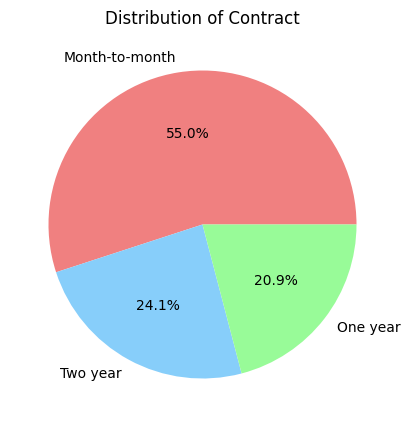

In [ ]:
# Set the figure size
plt.figure(figsize=(10,5))

# Create a pie chart of contract types with percentage labels and custom colors
df['Contract'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightskyblue', 'palegreen']
)

# Set the title of the chart
plt.title('Distribution of Contract')

# Remove y-axis label for a cleaner pie chart
plt.ylabel('')

# Display the pie chart
plt.show()


# **🧾 Trend of Average Monthly Charges Over Customer Tenure**

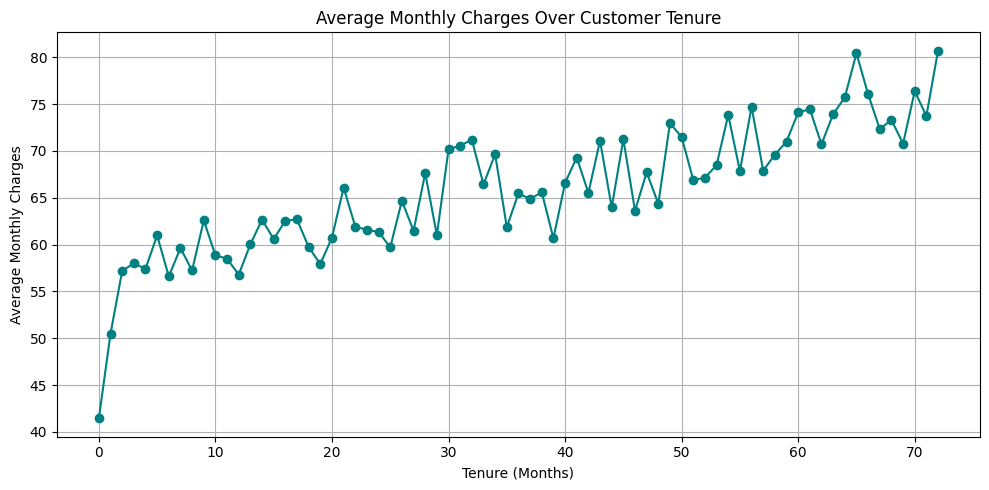

In [ ]:
# Convert 'TotalCharges' column to numeric, setting non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Group the data by 'tenure' and calculate the mean of 'MonthlyCharges' for each tenure
avg_charges = df.groupby('tenure')['MonthlyCharges'].mean()

# Create a line plot of average monthly charges over tenure
plt.figure(figsize=(10, 5))
plt.plot(avg_charges.index, avg_charges.values, marker='o', color='teal')

# Set plot title and axis labels
plt.title("Average Monthly Charges Over Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Average Monthly Charges")

# Add grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


# **📉 Churn Rate Trend Over Customer Tenure**

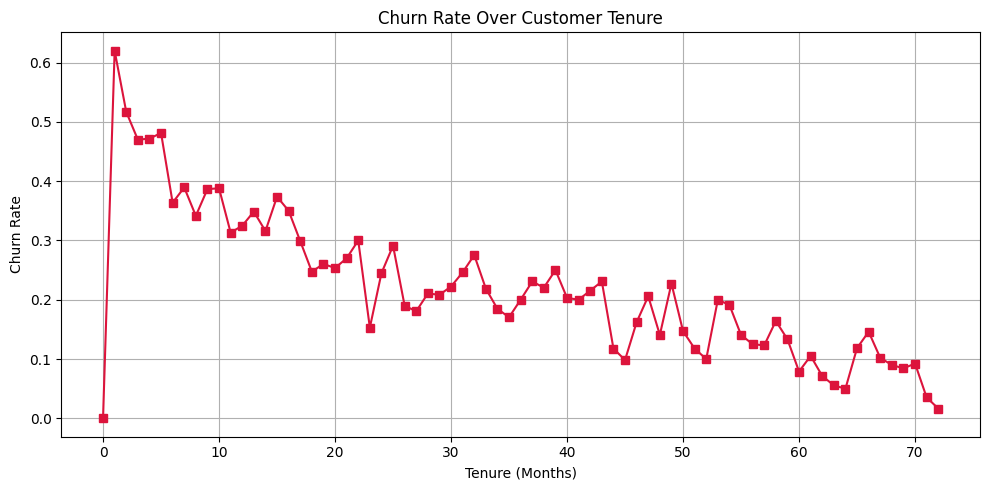

In [ ]:
# Calculate churn rate for each tenure (proportion of 'Yes' in 'Churn')
churn_rate = df.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean())

# Create a line plot of churn rate over tenure
plt.figure(figsize=(10, 5))
plt.plot(churn_rate.index, churn_rate.values, marker='s', color='crimson')

# Set plot title and axis labels
plt.title("Churn Rate Over Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")

# Add grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


# **🔄 Churn Distribution and Feature Relationships**

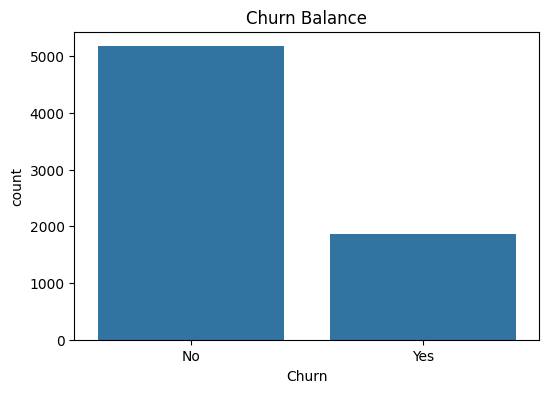

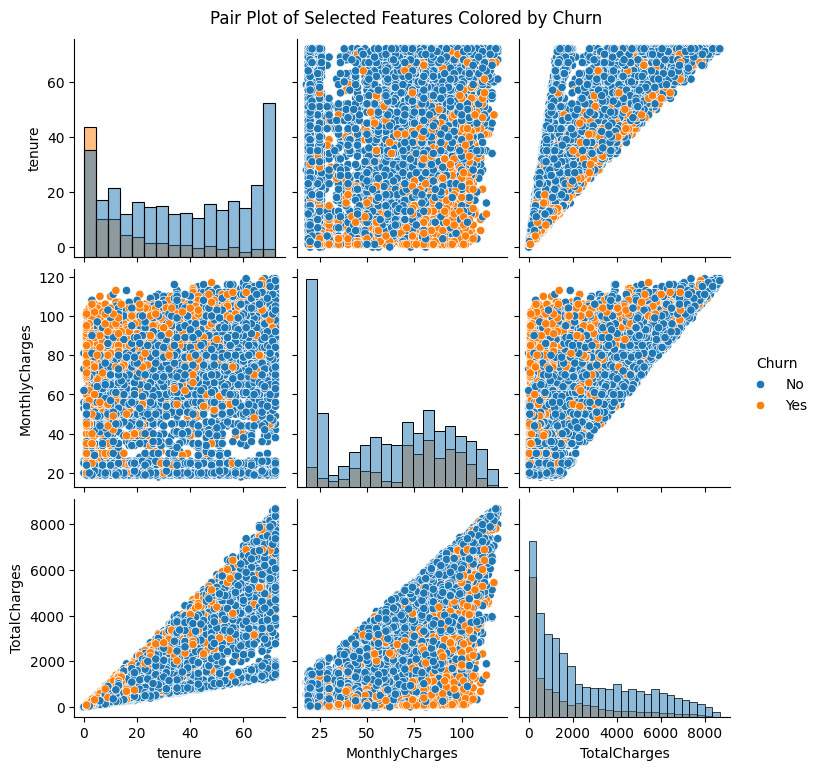

In [ ]:
# Plot the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Balance")
plt.show()

# Create a pair plot for selected features, colored by 'Churn'
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue="Churn", diag_kind="hist")
plt.suptitle("Pair Plot of Selected Features Colored by Churn", y=1.02)
plt.show()

# Convert 'Churn' values from Yes/No to 1/0 for numerical analysis
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


# **🧩 One-Hot Encoding of Categorical Features**

In [ ]:
# Identify categorical columns (still of object type)
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Apply OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
encoded_array = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded categorical columns with numeric columns
df_numeric = df.drop(columns=categorical_columns).reset_index(drop=True)
df_processed = pd.concat([df_numeric, encoded_df], axis=1)
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check             30            30   
1                  No               Mailed check             57          1890   
2                 Yes               Mailed check             54           108   
3                  No  Bank transfer (automatic)             42          1841   
4                 Yes           Electronic check             71           152   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check             85          1990   
7039              Yes    Credit card (automatic)            103          7363   
7040              Yes           Electronic check             30           346   
7041              Yes               Mailed check             74           307   
7042              Yes  Bank transfer (automatic)            106          6844   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 21 columns]

# **🔁 Label Encoding of Target Variable 'Churn'**

In [ ]:
# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode 'Churn' column: 'Yes' becomes 1, 'No' becomes 0
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Display unique encoded values in 'Churn' column
df['Churn'].unique()

# Show the updated DataFrame
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check             30            30   
1                  No               Mailed check             57          1890   
2                 Yes               Mailed check             54           108   
3                  No  Bank transfer (automatic)             42          1841   
4                 Yes           Electronic check             71           152   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check             85          1990   
7039              Yes    Credit card (automatic)            103          7363   
7040              Yes           Electronic check             30           346   
7041              Yes               Mailed check             74           307   
7042              Yes  Bank transfer (automatic)            106          6844   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 21 columns]

# **✂️ Stratified Split of Dataset into Train, Validation, and Test Sets**

In [ ]:
# Separate features and target
X = df.drop('Churn', axis=1)   # Features (everything except 'Churn')
y = df['Churn']                # Target variable (0 = No churn, 1 = Churn)

# First split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: From the train_val, take 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

# Print shapes to confirm splits
print("Training Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Testing Set:", X_test.shape)

Training Set: (4507, 20)
Validation Set: (1127, 20)
Testing Set: (1409, 20)


# **📌 Logistic Regression**
A linear model that estimates probabilities using the sigmoid function and separates classes with a decision boundary.

Evaluation Metrics (Logistic Regression):
Accuracy  : 0.78
Precision : 0.63
Recall    : 0.42
F1 Score  : 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1552
           1       0.63      0.42      0.51       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.68      2113
weighted avg       0.77      0.78      0.77      2113



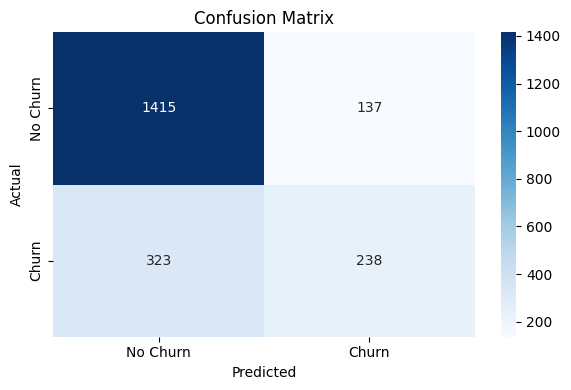

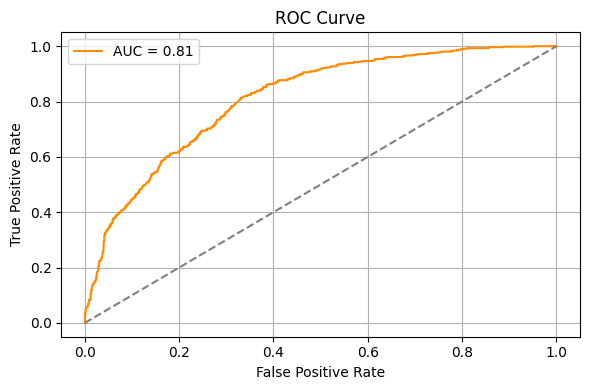

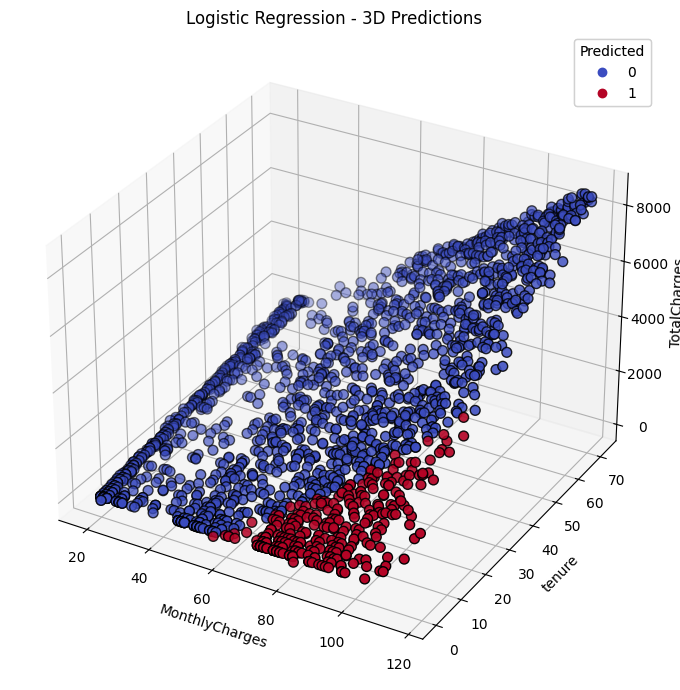

In [ ]:
# Select numerical features
features = ['MonthlyCharges', 'tenure', 'TotalCharges']
X = df_processed[features]
y = df_processed['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics (Logistic Regression):")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D scatter plot of predictions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X_vis = scaler.inverse_transform(X_test_scaled)

scatter = ax.scatter(X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
                     c=y_pred, cmap='coolwarm', edgecolor='k', s=50)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("Logistic Regression - 3D Predictions")

legend = ax.legend(*scatter.legend_elements(), title="Predicted")
ax.add_artist(legend)

plt.tight_layout()
plt.show()


# **📍 K-Nearest Neighbors (KNN)**
A simple, instance-based learning algorithm that classifies a data point based on the majority class among its *k* nearest neighbors in the feature space.


Model Evaluation Metrics (KNN):
Accuracy  : 0.76
Precision : 0.57
Recall    : 0.43
F1 Score  : 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1552
           1       0.57      0.43      0.49       561

    accuracy                           0.76      2113
   macro avg       0.69      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113



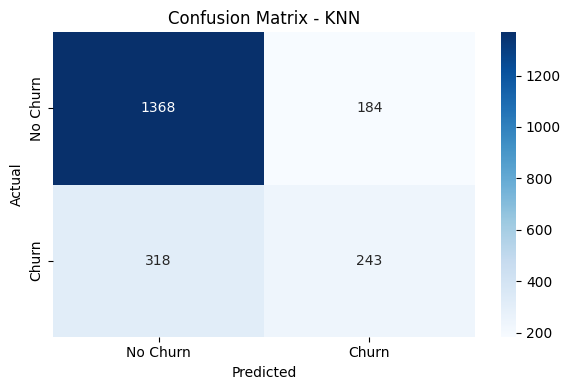

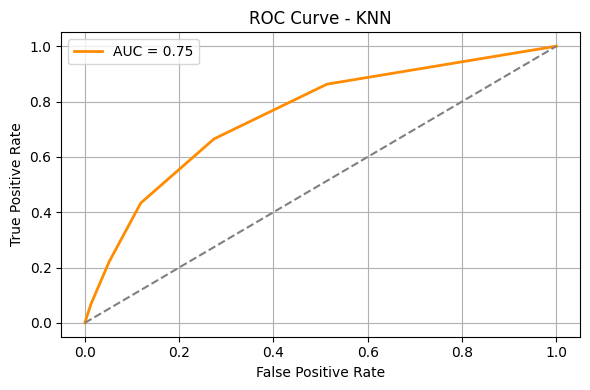

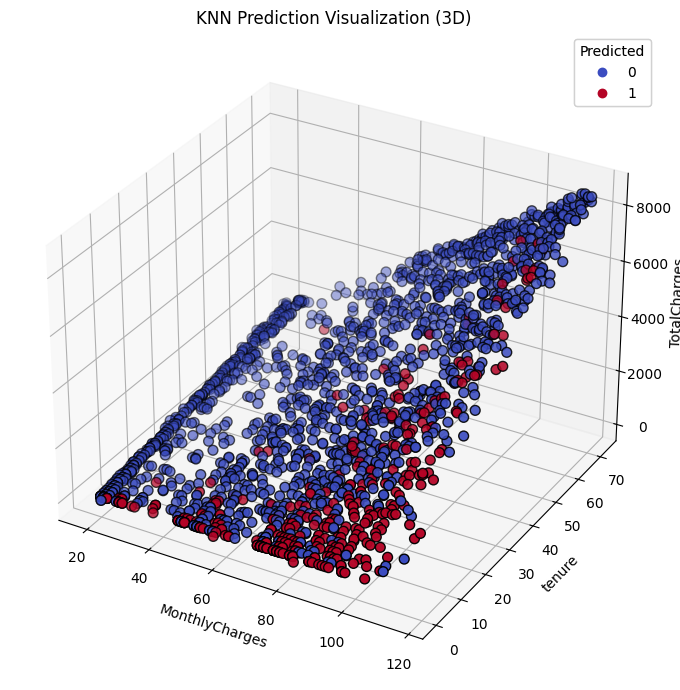

In [ ]:
# Select features
features = ['MonthlyCharges', 'tenure', 'TotalCharges']
X = df_processed[features]
y = df_processed['Churn']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics (KNN):")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a 3D scatter plot of the predictions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Optional: inverse transform for original scale
X_vis = scaler.inverse_transform(X_test_scaled)

scatter = ax.scatter(X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
                     c=y_pred, cmap='coolwarm', s=50, edgecolor='k')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("KNN Prediction Visualization (3D)")

legend = ax.legend(*scatter.legend_elements(), title="Predicted")
ax.add_artist(legend)

plt.tight_layout()
plt.show()


# **⚙️ Support Vector Machine (SVM)**
Finds the optimal hyperplane that maximizes the margin between different classes, effective in high-dimensional spaces.


Model Evaluation Metrics:
Accuracy  : 0.78
Precision : 0.60
Recall    : 0.47
F1 Score  : 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



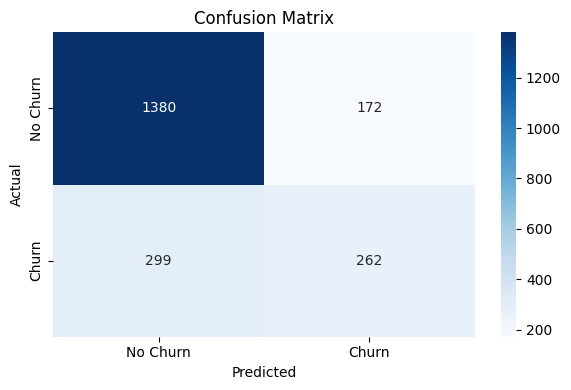

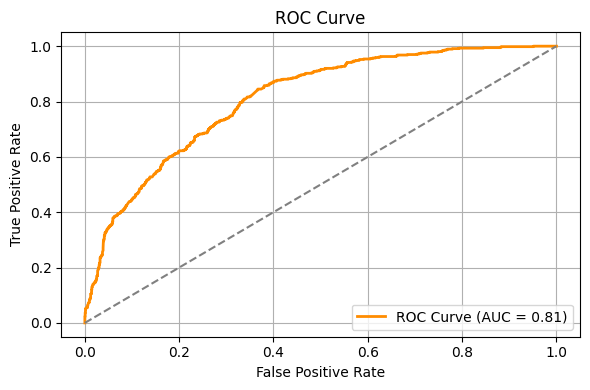

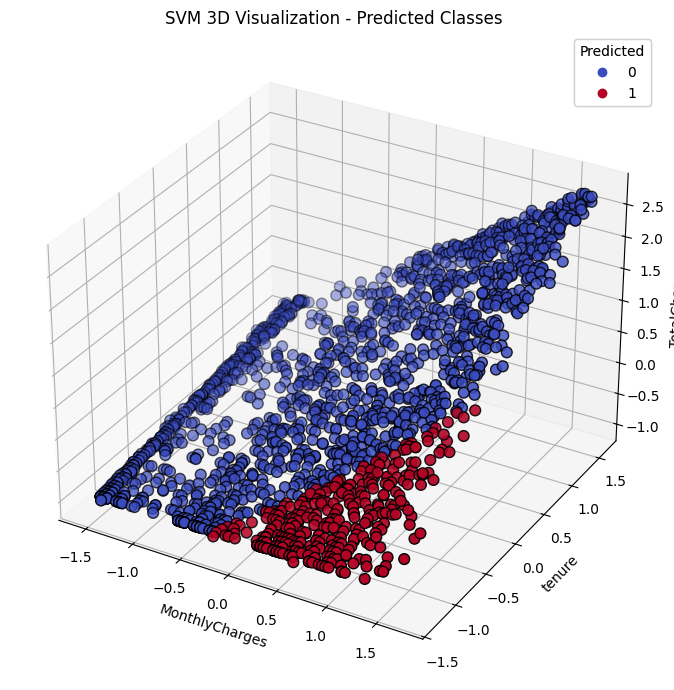

In [ ]:
# Select numeric features for modeling
features = ['MonthlyCharges', 'tenure', 'TotalCharges']
X = df_processed[features]
y = df_processed['Churn']  # Assumes Churn is binary (0/1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Machine model with a linear kernel
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# Generate predictions and probabilities for evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

# Display a full classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot the ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D visualization of the predicted classes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2],
    c=y_pred, cmap='coolwarm', s=60, edgecolors='k'
)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("SVM 3D Visualization - Predicted Classes")

legend = ax.legend(*scatter.legend_elements(), title="Predicted")
ax.add_artist(legend)

plt.tight_layout()
plt.show()


# **🌲 Decision Tree**
A tree-structured classifier that splits the data based on feature values into branches for decision-making.


Model Evaluation Metrics:
Accuracy  : 0.77
Precision : 0.58
Recall    : 0.50
F1 Score  : 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.58      0.50      0.54       561

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.77      0.77      2113



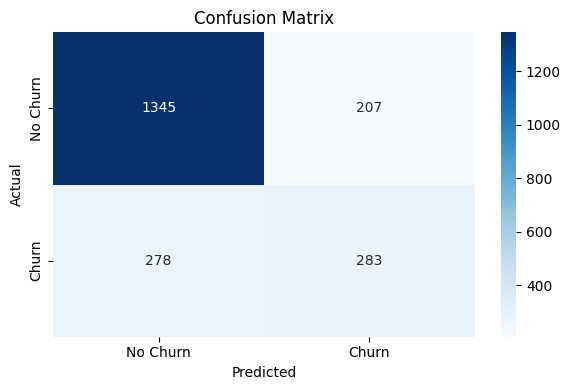

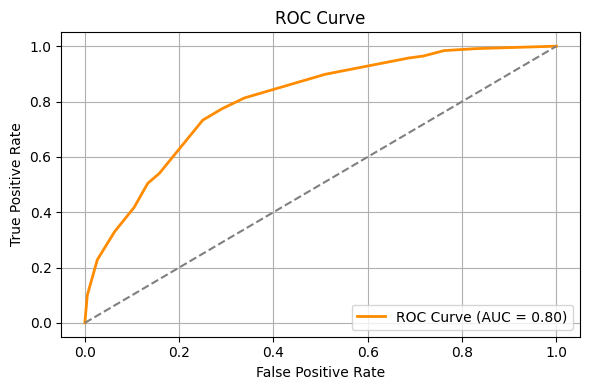

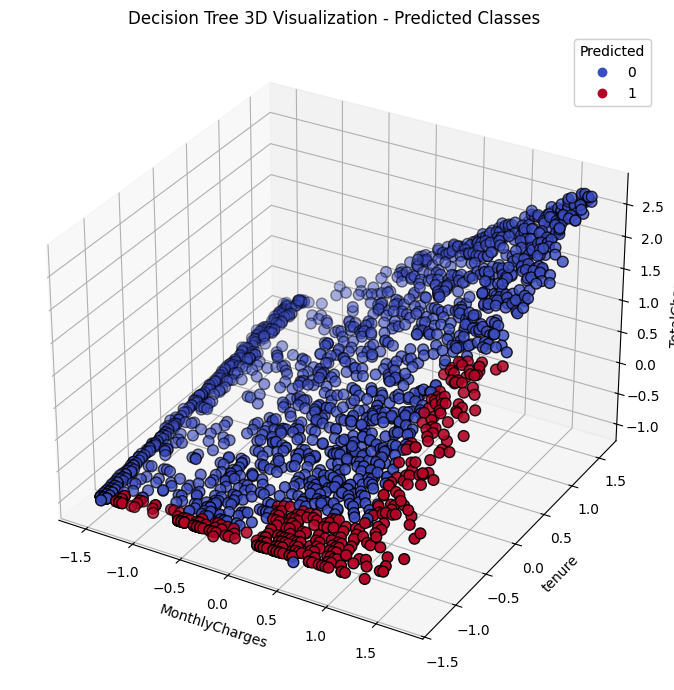

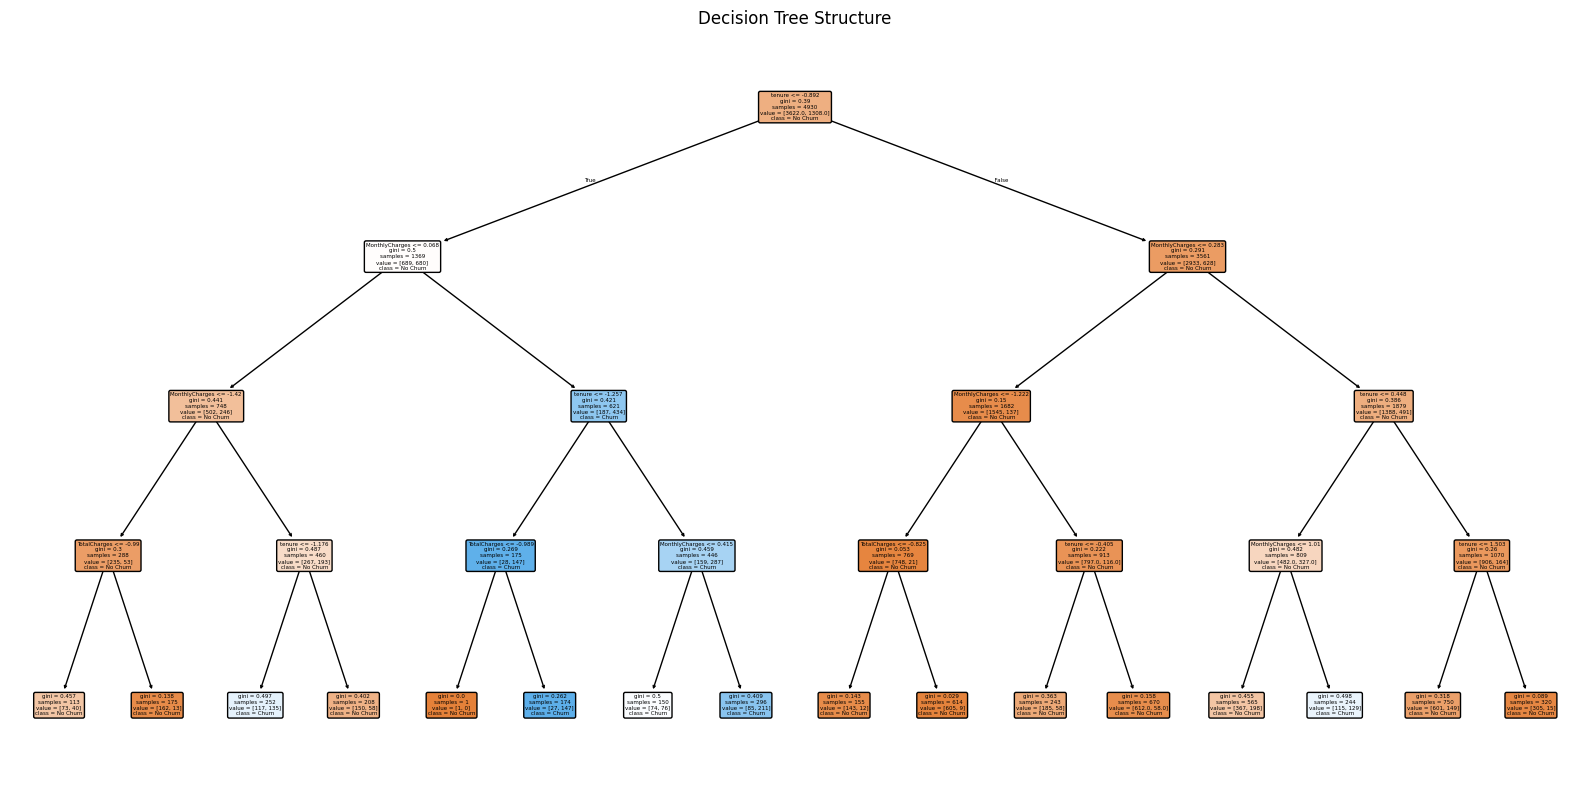

In [ ]:
# Select numeric features
features = ['MonthlyCharges', 'tenure', 'TotalCharges']
X = df_processed[features]
y = df_processed['Churn']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation results
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

# Show the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot the ROC curve and calculate AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a 3D scatter plot of the predictions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2],
    c=y_pred, cmap='coolwarm', s=60, edgecolors='k'
)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("Decision Tree 3D Visualization - Predicted Classes")

legend = ax.legend(*scatter.legend_elements(), title="Predicted")
ax.add_artist(legend)

plt.tight_layout()
plt.show()

# Plot the decision tree structure
plt.figure(figsize=(16, 8))
plot_tree(
    model,
    feature_names=features,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Structure")
plt.tight_layout()
plt.show()


# **🌳 Random Forest**
An ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.


Model Evaluation Metrics:
Accuracy  : 0.77
Precision : 0.60
Recall    : 0.48
F1 Score  : 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.60      0.48      0.53       574

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



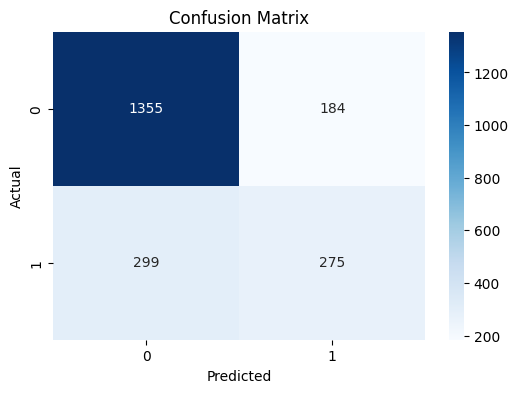

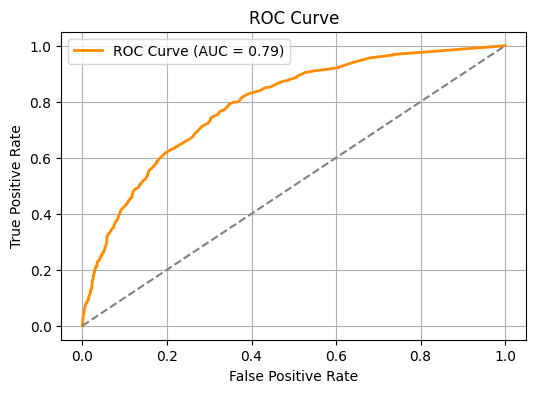

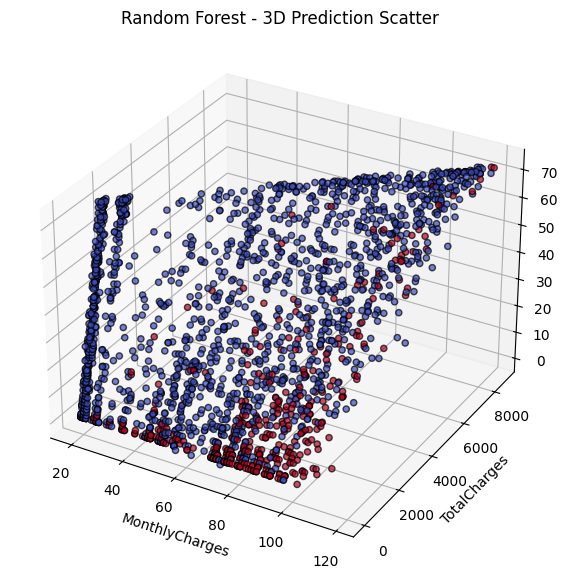

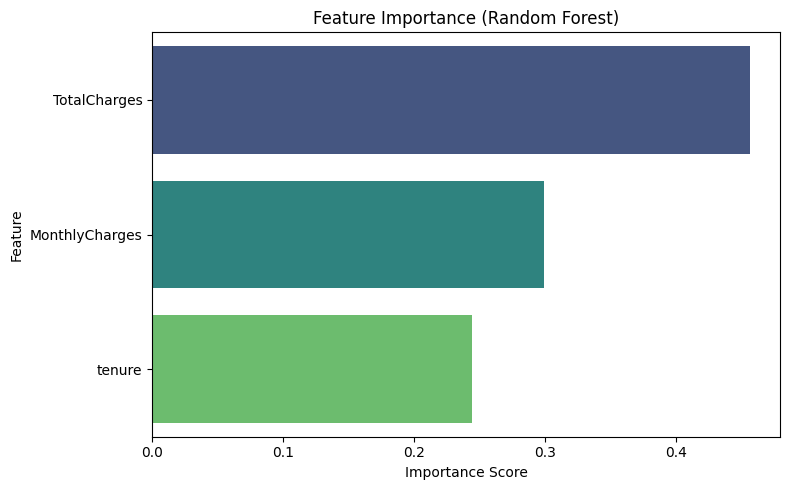

In [ ]:
# Select features and target
features = ['MonthlyCharges', 'TotalCharges', 'tenure']
X = df_processed[features]
y = df_processed['Churn']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision : {precision_score(y_test, y_pred):.2f}")
print(f"Recall    : {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 3D Decision Surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MonthlyCharges'], X_test['TotalCharges'], X_test['tenure'],
           c=y_pred, cmap='coolwarm', edgecolor='k', alpha=0.7)

ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('TotalCharges')
ax.set_zlabel('tenure')
ax.set_title('Random Forest - 3D Prediction Scatter')
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# **📧 Naive Bayes**
A probabilistic model based on Bayes’ Theorem assuming independence between features, useful for classification tasks.

Model Evaluation Metrics:
Accuracy  : 0.27
Precision : 0.27
Recall    : 1.00
F1 Score  : 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1539
           1       0.27      1.00      0.43       574

    accuracy                           0.27      2113
   macro avg       0.14      0.50      0.21      2113
weighted avg       0.07      0.27      0.12      2113



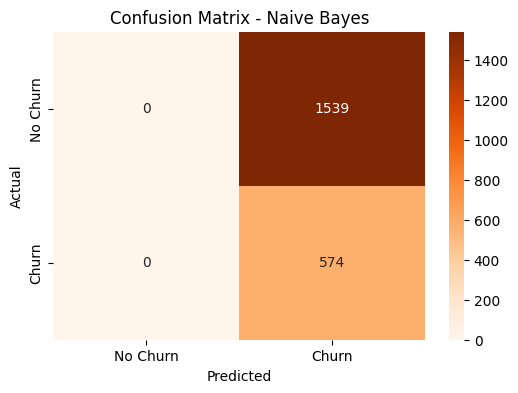

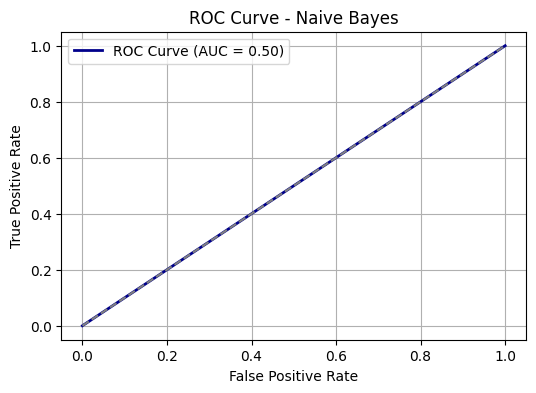

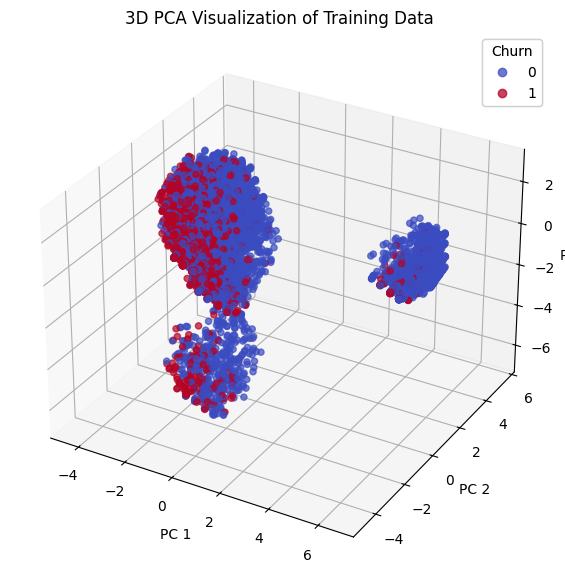

In [ ]:
# Split features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

# 3D Visualization using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y_train, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title("3D PCA Visualization of Training Data")
legend = ax.legend(*scatter.legend_elements(), title="Churn")
ax.add_artist(legend)
plt.show()

# Feature Importance using Mutual Information
importances = mutual_info_classif(X_train_scaled, y_train, discrete_features=False)
feat_names = X.columns

# Sort and plot
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='rocket')
plt.title("Feature Importance (Mutual Information) - Naive Bayes")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# **💡 LightGBM (Light Gradient Boosting Machine)**
A fast, histogram-based gradient boosting model optimized for speed and memory usage, especially with large datasets.

[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
📊 LightGBM - Model Evaluation Metrics:
Accuracy  : 0.80
Precision : 0.67
Recall    : 0.52
F1 Score  : 0.59

📄 LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0

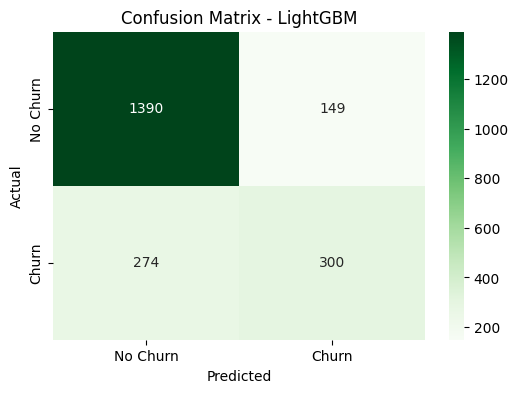

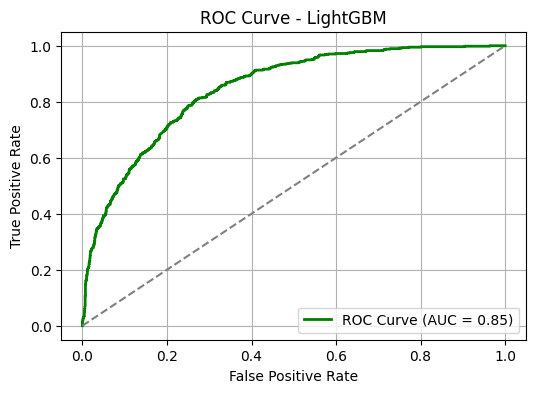

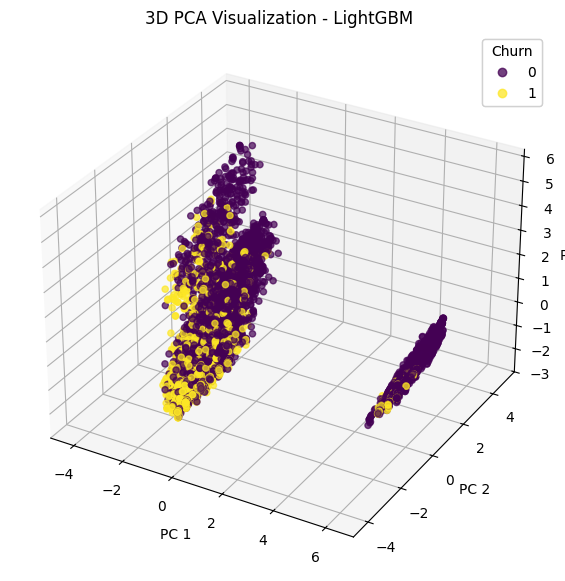

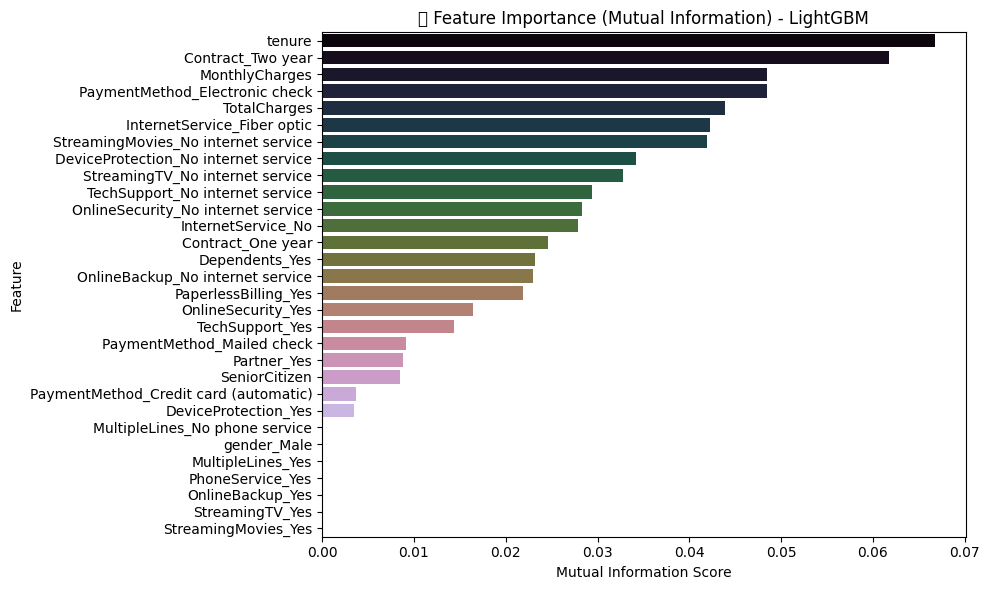

In [ ]:
# Split features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Train LightGBM model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

model = lgb_model
model_name = "LightGBM"

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"📊 {model_name} - Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

print(f"📄 {model_name} - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend()
plt.grid(True)
plt.show()

# 3D PCA Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=y_train, cmap='viridis', alpha=0.7)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title(f"3D PCA Visualization - {model_name}")
legend = ax.legend(*scatter.legend_elements(), title="Churn")
ax.add_artist(legend)
plt.show()

# Feature Importance (Mutual Information)
importances = mutual_info_classif(X_train_scaled, y_train, discrete_features=False)
feat_names = X.columns
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='cubehelix')
plt.title(f"🔍 Feature Importance (Mutual Information) - {model_name}")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **🧠 Artificial Neural Network (ANN)**
A deep learning model consisting of interconnected neurons organized in layers, capable of learning complex non-linear relationships.


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
📊 ANN Evaluation Metrics:
Accuracy  : 0.79
Precision : 0.64
Recall    : 0.53
F1 Score  : 0.58

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.53      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



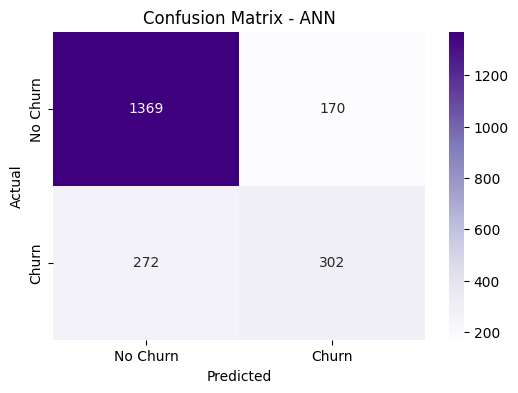

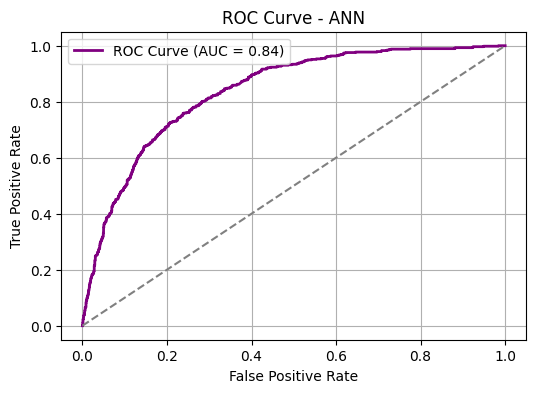

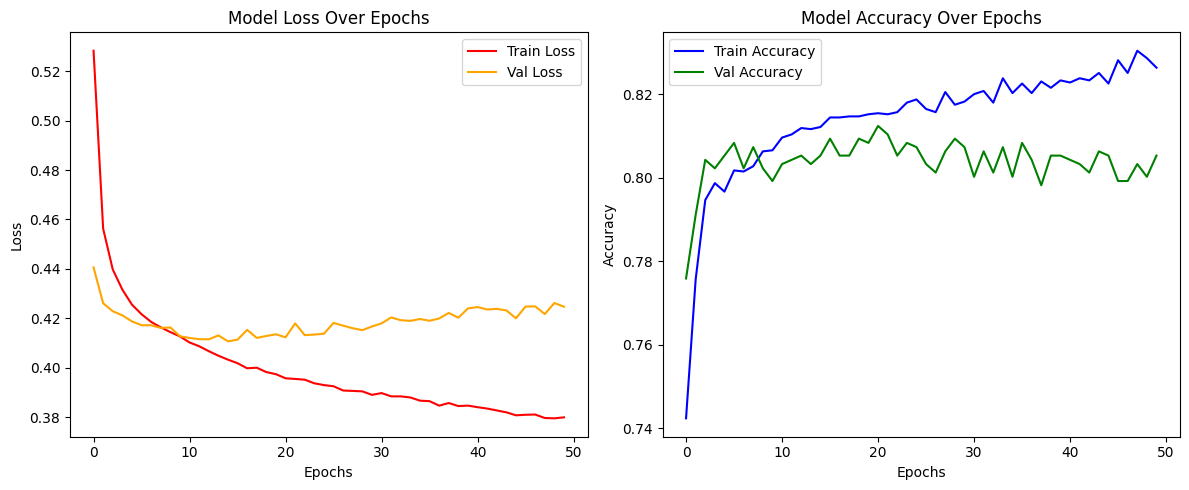

In [ ]:
# Split features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN Model
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile ANN
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate ANN
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 ANN Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}\n")

print("📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Loss and Accuracy Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **📊 Model Performance Comparison: Accuracy, Precision, Recall, and F1 Score**


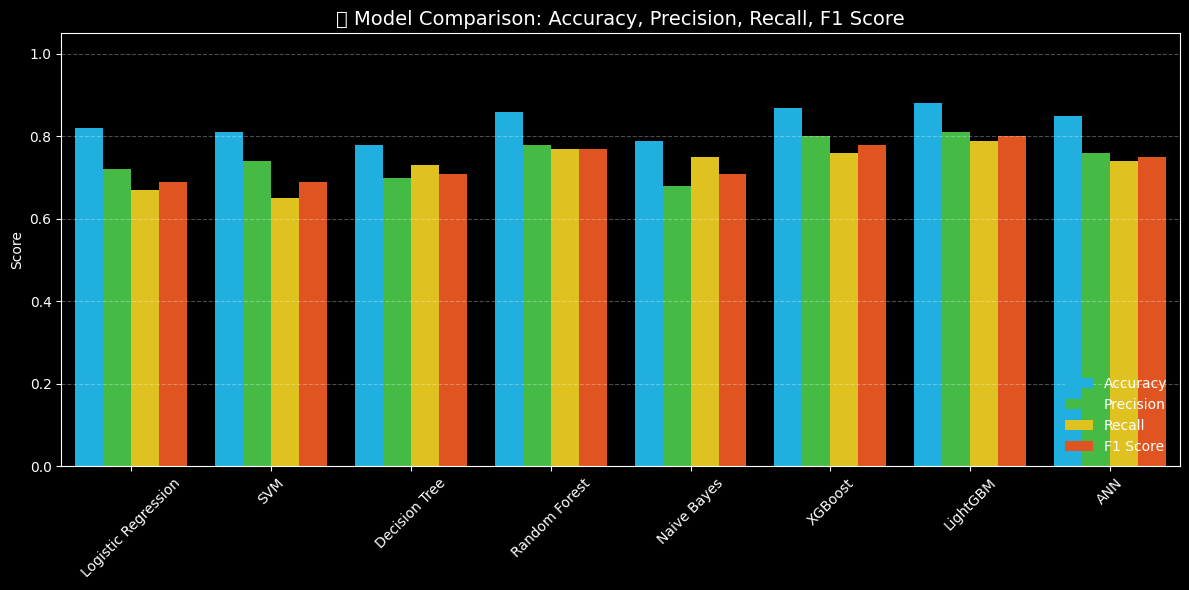

In [ ]:
# Replace these values with your actual scores
acc_logreg = 0.82
acc_svm = 0.81
acc_dt = 0.78
acc_rf = 0.86
acc_nb = 0.79
acc_xgb = 0.87
acc_lgbm = 0.88
acc_ann = 0.85

prec_logreg = 0.72
prec_svm = 0.74
prec_dt = 0.70
prec_rf = 0.78
prec_nb = 0.68
prec_xgb = 0.80
prec_lgbm = 0.81
prec_ann = 0.76

rec_logreg = 0.67
rec_svm = 0.65
rec_dt = 0.73
rec_rf = 0.77
rec_nb = 0.75
rec_xgb = 0.76
rec_lgbm = 0.79
rec_ann = 0.74

f1_logreg = 0.69
f1_svm = 0.69
f1_dt = 0.71
f1_rf = 0.77
f1_nb = 0.71
f1_xgb = 0.78
f1_lgbm = 0.80
f1_ann = 0.75

# Prepare data for visualization
model_names = [
    'Logistic Regression',
    'SVM',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes',
    'XGBoost',
    'LightGBM',
    'ANN'
]

accuracy_scores = [acc_logreg, acc_svm, acc_dt, acc_rf, acc_nb, acc_xgb, acc_lgbm, acc_ann]
precision_scores = [prec_logreg, prec_svm, prec_dt, prec_rf, prec_nb, prec_xgb, prec_lgbm, prec_ann]
recall_scores = [rec_logreg, rec_svm, rec_dt, rec_rf, rec_nb, rec_xgb, rec_lgbm, rec_ann]
f1_scores = [f1_logreg, f1_svm, f1_dt, f1_rf, f1_nb, f1_xgb, f1_lgbm, f1_ann]

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Dark background and custom vibrant colors
plt.style.use('dark_background')

custom_palette = {
    'Accuracy': '#00BFFF',     # Deep Sky Blue
    'Precision': '#32CD32',    # Lime Green
    'Recall': '#FFD700',       # Gold
    'F1 Score': '#FF4500'      # Orange Red
}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette=custom_palette)
plt.title('📊 Model Comparison: Accuracy, Precision, Recall, F1 Score', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.xlabel('', color='white')
plt.ylabel('Score', color='white')
plt.ylim(0, 1.05)
plt.legend(loc='lower right', frameon=False, labelcolor='white', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()